In [16]:
import geoplot as gplt 
import geoplot.crs as gcrs
import geopandas as gpd
gpd.__version__
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from fiona.crs import from_epsg
import mapclassify as mc
import glob

#해안선 받아놓기

coastline= gpd.read_file('./Coastlinse_khoa/Coastlinse_khoa.shp', encoding='utf8')
#5179로변환  

coastline= coastline.to_crs(epsg=5179)

In [62]:
#맵 그리기 함수선언
def plot_map(data):
    ax = data.plot(figsize=(50, 30),facecolor='yellow', edgecolor='black',linewidth=0.5, zorder=2)
    coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=1,linewidth=0.5)
    plt.grid(True, alpha=0.5, linestyle='--')
    
def plot_colormap(data, column, interval, data2=None, data3=None, figsize = [50,30]):
    if data2 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    elif data3 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    else:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        data3.plot(ax = ax, facecolor='red', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')


In [63]:
input = gpd.read_file('./Ex/220204/남한육역 면적/남한육역 면적.shp', encoding='utf8')
# plot_map(input)

In [64]:
flist = glob.glob('./Ex/220204/법정정보/**/*.shp', recursive=True)
for fname in flist:
    print(fname.split('\\')[-1].split('.')[0])
flist

교통안전특정해역
도선사승하선구역
신항만예정지역
정박지구역
통항분리구역
통항제한금지구역
항만구역
항만배후단지
깊은수심항로
마리나추천항로
양길항로
요트항로
일반항로
지방청 고시항로
지정항로
무역항
연안항
문화재구역
문화재보호구역
바다숲
인공어초
천연기념물
천연보호구역
특정도서
해양보호구역
해양보호생물서식지
해중경관지구
환경보전해역
국립공원
군립공원
도립공원
절대보전무인도서
준보전무인도서
바다목장(면)
바다목장(점)
생물권보전지역
생태경관보전지역
자연환경보전지역
서식산란장(면)
서식산란장(점)
세계유산지정구역
습지보호구역


['./Ex/220204/법정정보\\8.항만항행(18)\\교통안전특정해역.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\도선사승하선구역.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\신항만예정지역.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\정박지구역.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\통항분리구역.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\통항제한금지구역.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\항만구역.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\항만배후단지.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\항로(7)\\깊은수심항로.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\항로(7)\\마리나추천항로.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\항로(7)\\양길항로.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\항로(7)\\요트항로.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\항로(7)\\일반항로.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\항로(7)\\지방청 고시항로.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\항로(7)\\지정항로.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\항만시설(2)\\무역항.shp',
 './Ex/220204/법정정보\\8.항만항행(18)\\항만시설(2)\\연안항.shp',
 './Ex/220204/법정정보\\9.환경생태계(26)\\문화재구역.shp',
 './Ex/220204/법정정보\\9.환경생태계(26)\\문화재보호구역.shp',
 './Ex/220204/법정정보\\9.환경생태계(26)\\바다숲.shp',
 './Ex/220204/법정정보\\9.환경생태계(26)\\인공어초.sh

In [65]:
# flist = ['D:/###기타업무/개인연구/2021/Geopandas/Ex/220203/법정정보/9.환경생태계(26)/해양보호생물서식지.shp']
for fname in flist:
    print(fname.split('\\')[-1].split('.')[0])
    try:
        object = gpd.read_file(fname, encoding='utf8')
        # object = object['geometry']
    except Exception as e:
        # print(e, fname)
        object = gpd.read_file(fname, encoding='euckr')
        # object = object['geometry']
    # print(object)   
    object= object.to_crs(epsg=5179)
    # result = gpd.overlay( input, object, how='difference')
    result = gpd.overlay(object, input,how='difference')
    
    # columnlist = result.columns.tolist()
    # result=result[[columnlist[0], 'geometry']]
    result=result[['geometry']]

    # print('저장을 시작합니다')
    try:
        result.to_file('./result/ex8/shp2/'+fname.split('\\')[-1].split('.')[0]+'.shp', encoding='euckr')
    except Exception as e:
        
    # print('저장이 완료되었습니다' )
    # plot_map(result)
    # result = gpd.sjoin(object, input,  op='intersects')
    # plt.savefig('./result
    # /ex8/'+fname.split('\\')[-1].split('.')[0],dpi=300)
    # plt.savefig('./result/ex8/test.png')
    # result.drop_duplicates(['MIN1'], keep='first', inplace=True)

교통안전특정해역
도선사승하선구역
신항만예정지역
정박지구역
통항분리구역
통항제한금지구역
항만구역
항만배후단지
깊은수심항로
마리나추천항로
양길항로
요트항로
일반항로
지방청 고시항로
지정항로
무역항
연안항
문화재구역
문화재보호구역
바다숲
인공어초
천연기념물


TopologyException: Input geom 0 is invalid: Self-intersection at 886354.52691209281 1969983.8971489228


TopologicalError: The operation 'GEOSDifference_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.multipolygon.MultiPolygon object at 0x0000027591534880>

C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\geopandas\base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


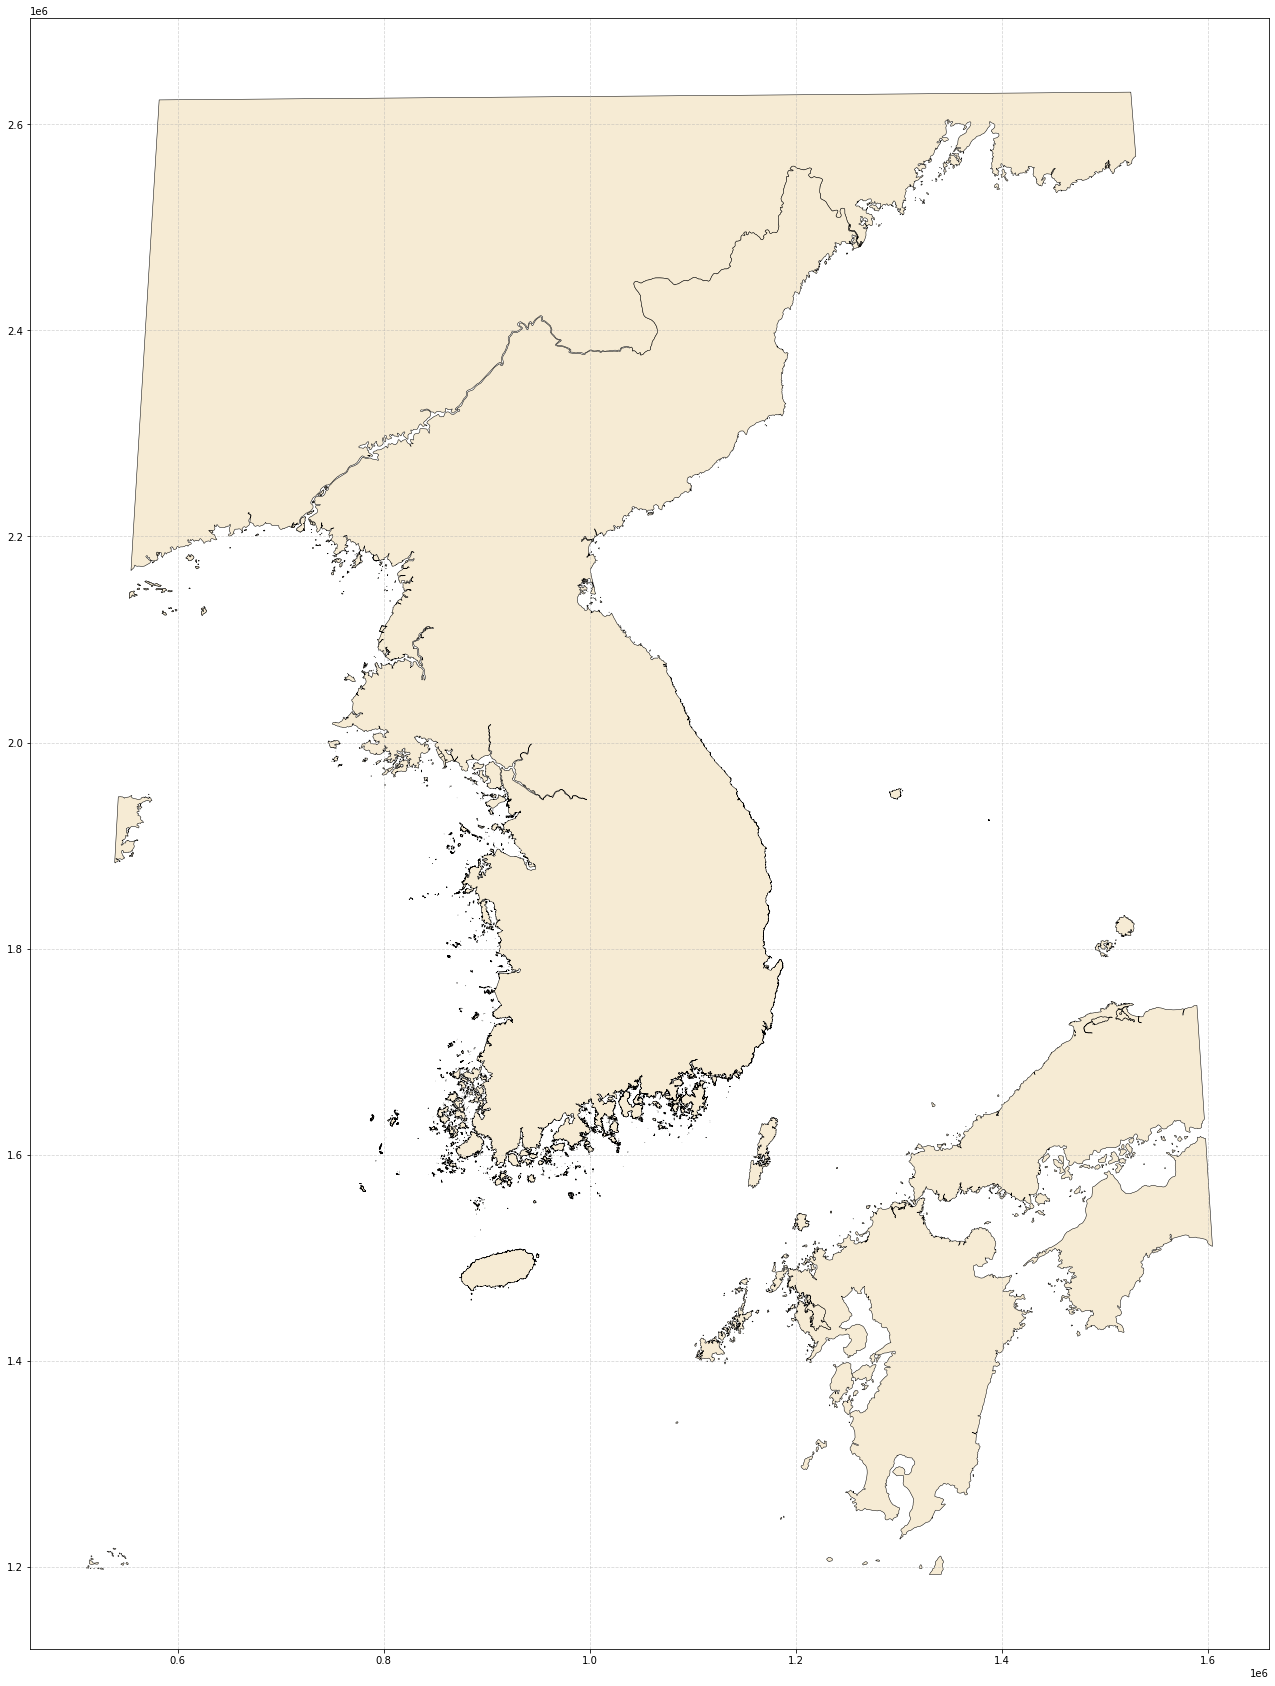

In [70]:
df = input.difference(object)
plot_map(df)

In [72]:
df.dropna(inplace=True)
df

0     POLYGON ((890131.095 1542330.902, 890133.452 1...
1     POLYGON ((890112.362 1542384.461, 890113.885 1...
2     POLYGON ((893121.707 1545874.136, 893122.050 1...
3     POLYGON ((893171.130 1546041.876, 893172.298 1...
4     POLYGON ((893105.576 1546162.657, 893105.878 1...
5     POLYGON ((889633.772 1546150.875, 889637.187 1...
6     POLYGON ((889515.542 1546230.865, 889517.577 1...
7     POLYGON ((889571.419 1546305.704, 889572.229 1...
8     POLYGON ((889543.472 1546327.664, 889543.708 1...
9     POLYGON ((889359.195 1546342.062, 889359.516 1...
10    POLYGON ((889423.675 1546399.995, 889423.755 1...
11    POLYGON ((893088.046 1546559.224, 893088.688 1...
12    POLYGON ((893080.823 1546662.228, 893082.947 1...
13    POLYGON ((891347.151 1546872.667, 891349.076 1...
14    POLYGON ((891369.216 1546878.387, 891373.262 1...
15    POLYGON ((891403.413 1546937.538, 891406.200 1...
16    POLYGON ((891370.607 1547019.777, 891372.185 1...
17    POLYGON ((891378.129 1547074.119, 891376.3

<AxesSubplot:>

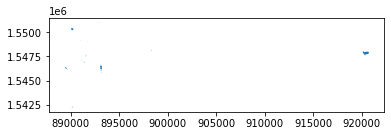

In [73]:
df.plot()

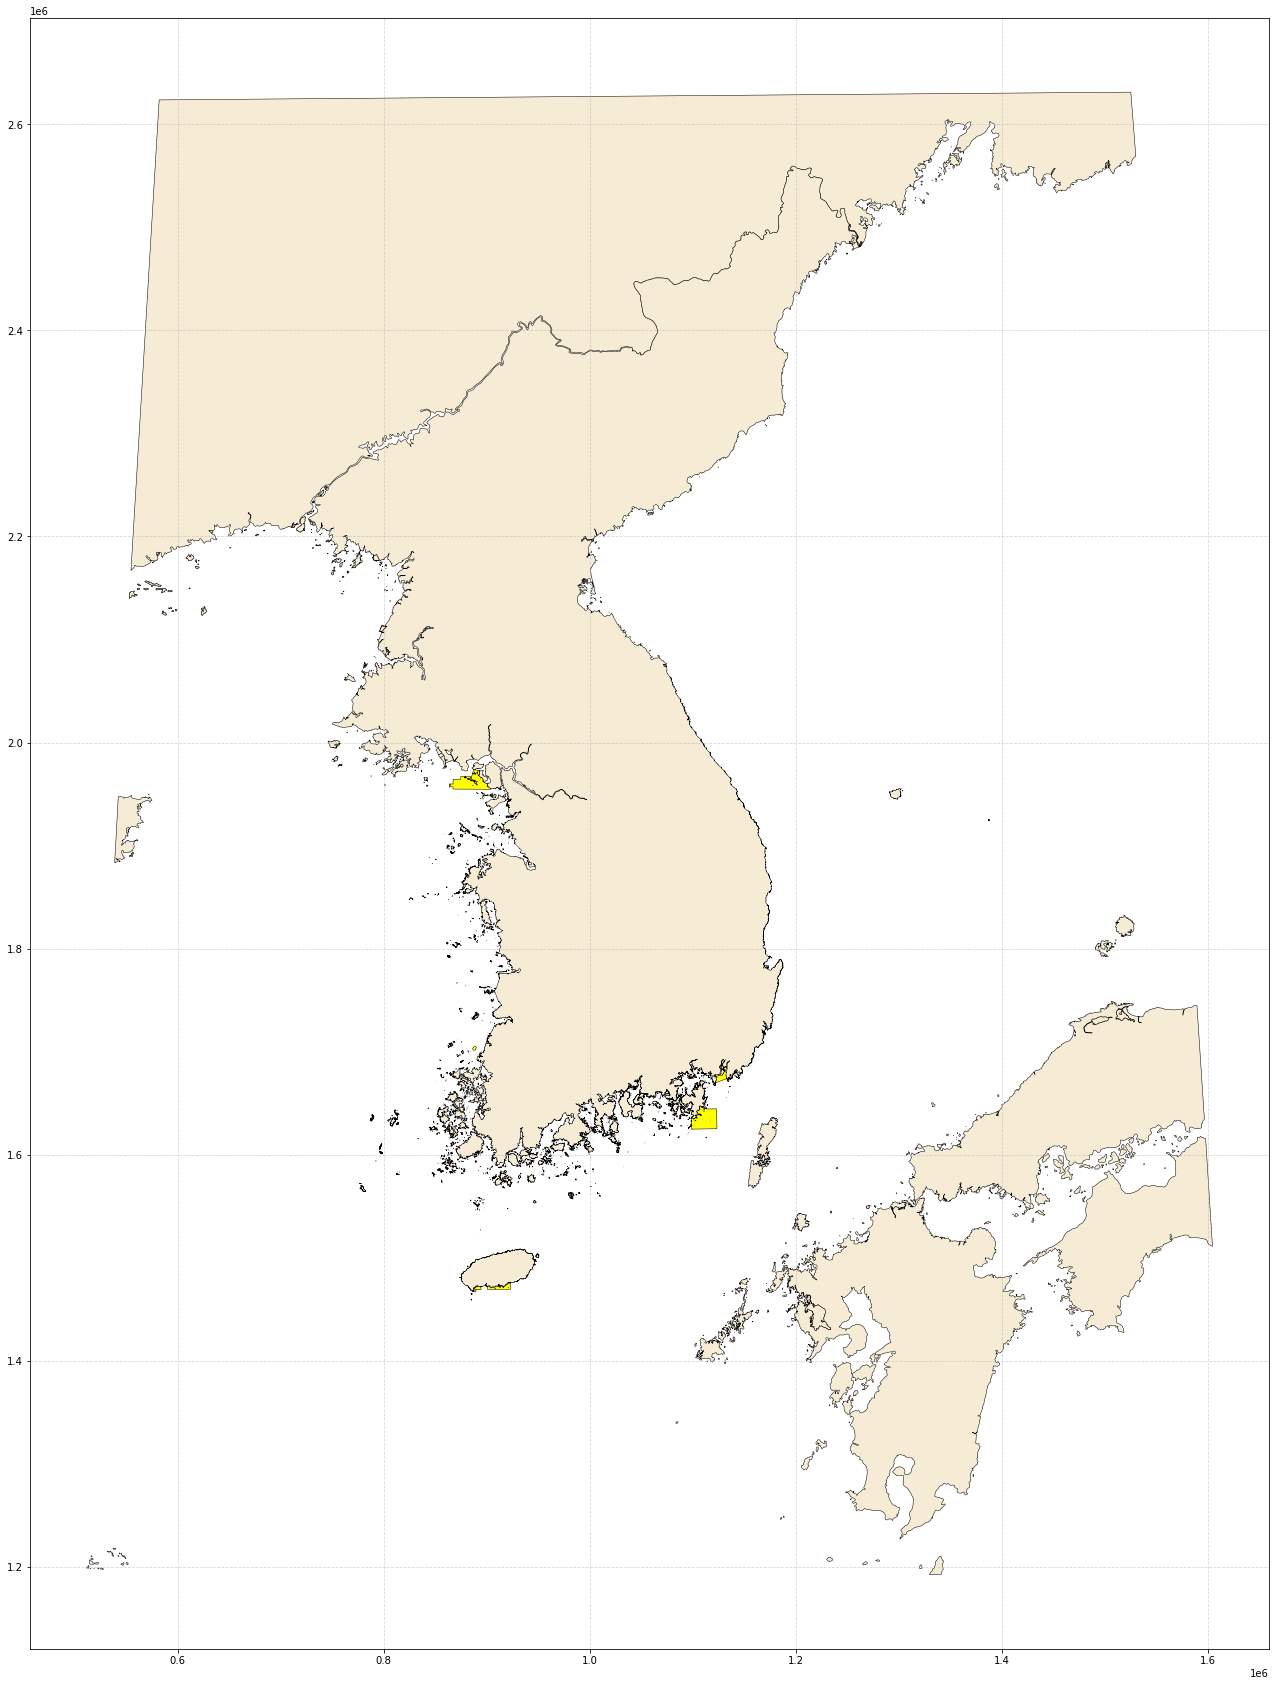

In [69]:
plot_map(object)

In [52]:
# flist = ['D:/###기타업무/개인연구/2021/Geopandas/Ex/220203/법정정보/9.환경생태계(26)/해양보호생물서식지.shp']
for fname in flist:
    print(fname.split('\\')[-1].split('.')[0])
    try:
        object = gpd.read_file(fname, encoding='utf8')
        # object = object['geometry']
    except Exception as e:
        # print(e, fname)
        object = gpd.read_file(fname, encoding='euckr')
        # object = object['geometry']
    # print(object)   
    object= object.to_crs(epsg=5179)
    # result = gpd.overlay( input, object, how='difference')
    # result = gpd.overlay(object, input,how='difference')
    # result = gpd.sjoin(object, input,  op='intersects')
    result = gpd.clip(object, input)
    # columnlist = result.columns.tolist()
    # result=result[[columnlist[0], 'geometry']]
    
    result2 = gpd.overlay(object, result,how='difference')
    result2=result2[['geometry']]
    # print('저장을 시작합니다')
    try:
        result2.to_file('./result/ex8/shp2/'+fname.split('\\')[-1].split('.')[0]+'.shp', encoding='euckr')
        
    # print('저장이 완료되었습니다' )
    # plot_map(result)
    # result = gpd.sjoin(object, input,  op='intersects')
    # plt.savefig('./result
    # /ex8/'+fname.split('\\')[-1].split('.')[0],dpi=300)
    # plt.savefig('./result/ex8/test.png')
    # result.drop_duplicates(['MIN1'], keep='first', inplace=True)

교통안전특정해역
저장을 시작합니다
저장이 완료되었습니다
도선사승하선구역
저장을 시작합니다
저장이 완료되었습니다
신항만예정지역
저장을 시작합니다
저장이 완료되었습니다
정박지구역
저장을 시작합니다


RuntimeError: GDAL Error: Attempt to write non-polygon (LINESTRING) geometry to POLYGON type shapefile. 
 
 Failed to write record: {'id': '105', 'type': 'Feature', 'properties': {}, 'geometry': {'type': 'GeometryCollection', 'geometries': [{'type': 'LineString', 'coordinates': ((912511.0926556371, 1472546.3543955695), (912552.0746762641, 1472498.71053472))}, {'type': 'LineString', 'coordinates': ((912583.0672111849, 1472461.2933925039), (912583.4314657251, 1472461.75010346))}, {'type': 'LineString', 'coordinates': ((912321.2290714426, 1472375.7158179856), (912321.0708012461, 1472375.95990231))}, {'type': 'LineString', 'coordinates': ((912352.8968859846, 1472383.970275323), (912353.268235345, 1472385.85985423))}, {'type': 'LineString', 'coordinates': ((912353.268235345, 1472385.85985423), (912353.5541898813, 1472387.4723580556))}, {'type': 'LineString', 'coordinates': ((912350.4458467206, 1472452.1999434403), (912350.486385741, 1472456.70354122))}, {'type': 'LineString', 'coordinates': ((912351.9203990287, 1472453.5129439703), (912351.749240842, 1472454.15303628))}, {'type': 'LineString', 'coordinates': ((912561.6306150025, 1472853.0765798155), (912561.6873945141, 1472853.21630555))}, {'type': 'LineString', 'coordinates': ((912598.0975357554, 1472808.4679723172), (912598.1258303979, 1472811.61982811))}, {'type': 'LineString', 'coordinates': ((912528.0550327821, 1472698.0170968918), (912527.2981686831, 1472694.56856922))}, {'type': 'LineString', 'coordinates': ((912527.2981686831, 1472694.56856922), (912527.0409101753, 1472693.8557132056))}, {'type': 'LineString', 'coordinates': ((912354.083946037, 1472380.9151503358), (912369.462031108, 1472377.56447571))}, {'type': 'Polygon', 'coordinates': (((912511.0926556371, 1472546.3543955695), (912511.1894030955, 1472545.8045296657), (912511.4827938884, 1472544.1370378654), (912582.9144656039, 1472461.1018764826), (912565.677462828, 1472439.4897148), (912560.908233864, 1472433.41200359), (912532.344145754, 1472398.51980811), (912539.99425584, 1472392.34164408), (912564.6648176521, 1472422.17946283), (912572.889831413, 1472432.29541709), (912589.9170253505, 1472454.07168776), (912590.0727494344, 1472454.0176707916), (912610.9293726082, 1472446.7830059554), (912611.1677516215, 1472446.7003179647), (912583.065577966, 1472420.99416339), (912474.504534406, 1472319.10663875), (912409.9193626391, 1472258.49306962), (912390.496307928, 1472240.3283556), (912387.063086412, 1472239.84919902), (912383.625415337, 1472237.83994908), (912317.777410428, 1472342.37093514), (912319.058409933, 1472342.86944553), (912324.256310061, 1472348.93209572), (912325.57417676, 1472352.49054524), (912327.3157918211, 1472356.54413678), (912327.3892614, 1472364.70419604), (912325.720919127, 1472368.78848971), (912322.4104435338, 1472373.8939057423), (912338.8382219615, 1472384.0869886822), (912343.3164569705, 1472384.0713169032), (912346.9551221898, 1472385.4429970398), (912352.8907080123, 1472383.9718065911), (912352.8968859846, 1472383.970275323), (912352.369874474, 1472381.28862311), (912354.083946037, 1472380.9151503358), (912353.9678535626, 1472380.2964185975), (912353.3904503364, 1472377.2190640685), (912393.5629224299, 1472368.1601873697), (912396.3490744466, 1472384.353127268), (912394.3705568006, 1472384.775248863), (912395.2493098819, 1472388.54234383), (912355.507398229, 1472396.53955743), (912353.7197606469, 1472388.40601519), (912353.5541898813, 1472387.4723580556), (912347.8871714586, 1472388.7549181979), (912347.5951424732, 1472389.6983362793), (912347.0938492954, 1472391.3177955511), (912346.3777772194, 1472393.6311116186), (912334.314490612, 1472388.659998851), (912332.1000668519, 1472390.245204408), (912327.6892706571, 1472393.4026933964), (912331.2767591585, 1472399.7314788154), (912335.7877717867, 1472408.5723661464), (912335.8345523693, 1472416.4495767057), (912339.5511432231, 1472422.1404834609), (912341.9103492359, 1472427.6919549734), (912341.9661982465, 1472440.5071255867), (912342.001931123, 1472447.7643942733), (912346.1960420738, 1472452.2227143003), (912350.0975051327, 1472452.2018098878), (912350.4458467206, 1472452.1999434403), (912350.4359868971, 1472451.10458694), (912352.569519566, 1472451.08538224), (912352.274109663, 1472452.1901474325), (912353.293441142, 1472452.184685757), (912357.5011242777, 1472557.3188773885), (912357.617263288, 1472581.2500196844), (912378.6550925955, 1472622.5141726271), (912393.6123972123, 1472651.4762855074), (912406.6768572746, 1472670.255771195), (912416.9380301515, 1472683.777261509), (912430.8931553896, 1472697.6116996002), (912430.9669562143, 1472714.7451801577), (912445.6109418445, 1472740.464297993), (912450.3632240617, 1472764.5220032083), (912450.3809510055, 1472771.6391242347), (912469.1352101162, 1472816.0090822442), (912479.6849262319, 1472827.5356035214), (912489.1571933037, 1472837.5272993345), (912495.3550896975, 1472843.0539273014), (912504.0566417822, 1472853.8142416899), (912560.0072800736, 1472866.672518738), (912560.57453959, 1472862.1226538524), (912561.1144309662, 1472857.7923028525), (912561.6306150025, 1472853.0765798155), (912558.181209231, 1472844.58811731), (912556.4211936591, 1472839.50347426), (912553.8180673821, 1472834.9475371), (912555.1132117801, 1472834.4190061972), (912554.9005511437, 1472833.893569705), (912512.4325032493, 1472766.1531009432), (912498.543416356, 1472736.5865278263), (912495.6844157018, 1472736.6054386464), (912494.87527101, 1472735.8741634341), (912494.6474816278, 1472735.327108229), (912494.3728103028, 1472734.6674621273), (912495.1752998467, 1472733.0797145527), (912497.7097075932, 1472731.996549016), (912499.5291140917, 1472731.9827184663), (912501.2379015556, 1472734.1063738754), (912512.8020859181, 1472757.1224012524), (912517.6859605365, 1472766.4484856604), (912558.0615918518, 1472830.940286104), (912597.6935767231, 1472811.4737005208), (912597.724055307, 1472811.4587299367), (912597.7362050673, 1472811.3614370574), (912597.7424488096, 1472811.311438403), (912597.7479685014, 1472811.267237802), (912598.0975357554, 1472808.4679723172), (912598.0709894311, 1472805.51086883), (912595.827592193, 1472794.32110722), (912594.0541115961, 1472786.69744213), (912592.2757911261, 1472779.57277783), (912587.89418275, 1472768.91225931), (912581.351725418, 1472755.22196227), (912576.136036243, 1472746.09907255), (912567.468981465, 1472734.45695355), (912562.7227914049, 1472730.92926104), (912553.663794083, 1472723.37103327), (912545.908780682, 1472717.84128073), (912542.033588519, 1472714.81581945), (912532.53225668, 1472705.73144894), (912530.3619736059, 1472702.69067611), (912528.191941573, 1472698.64089944), (912528.0550327821, 1472698.0170968918), (912506.2599080188, 1472710.1490190385), (912496.0968199049, 1472716.5299579839), (912493.2482228095, 1472718.3184620235), (912491.0879085195, 1472720.1047821098), (912490.6126560505, 1472720.4977587408), (912490.2539427682, 1472720.794371481), (912490.1778178073, 1472720.6509129065), (912480.3660473872, 1472702.1604916016), (912482.1998061795, 1472701.1473063135), (912489.1408808457, 1472714.7810217394), (912501.2904911081, 1472706.7791114799), (912507.0917022264, 1472705.1232007279), (912527.0409101753, 1472693.8557132056), (912525.1004891329, 1472688.47886164), (912523.75982644, 1472682.3703668), (912521.5392313281, 1472673.73064096), (912520.5663864891, 1472670.19124264), (912510.48223057, 1472633.58078805), (912506.925616128, 1472619.35366382), (912504.7048941561, 1472610.70285497), (912501.599893392, 1472598.0018093), (912510.561209367, 1472546.97223119), (912511.0926556371, 1472546.3543955695)),)}]}}

In [61]:
result2.to_csv('test.csv')

In [49]:
ratio=sum(result.area)/sum(object.area)*100
ratio

5.671040123725815

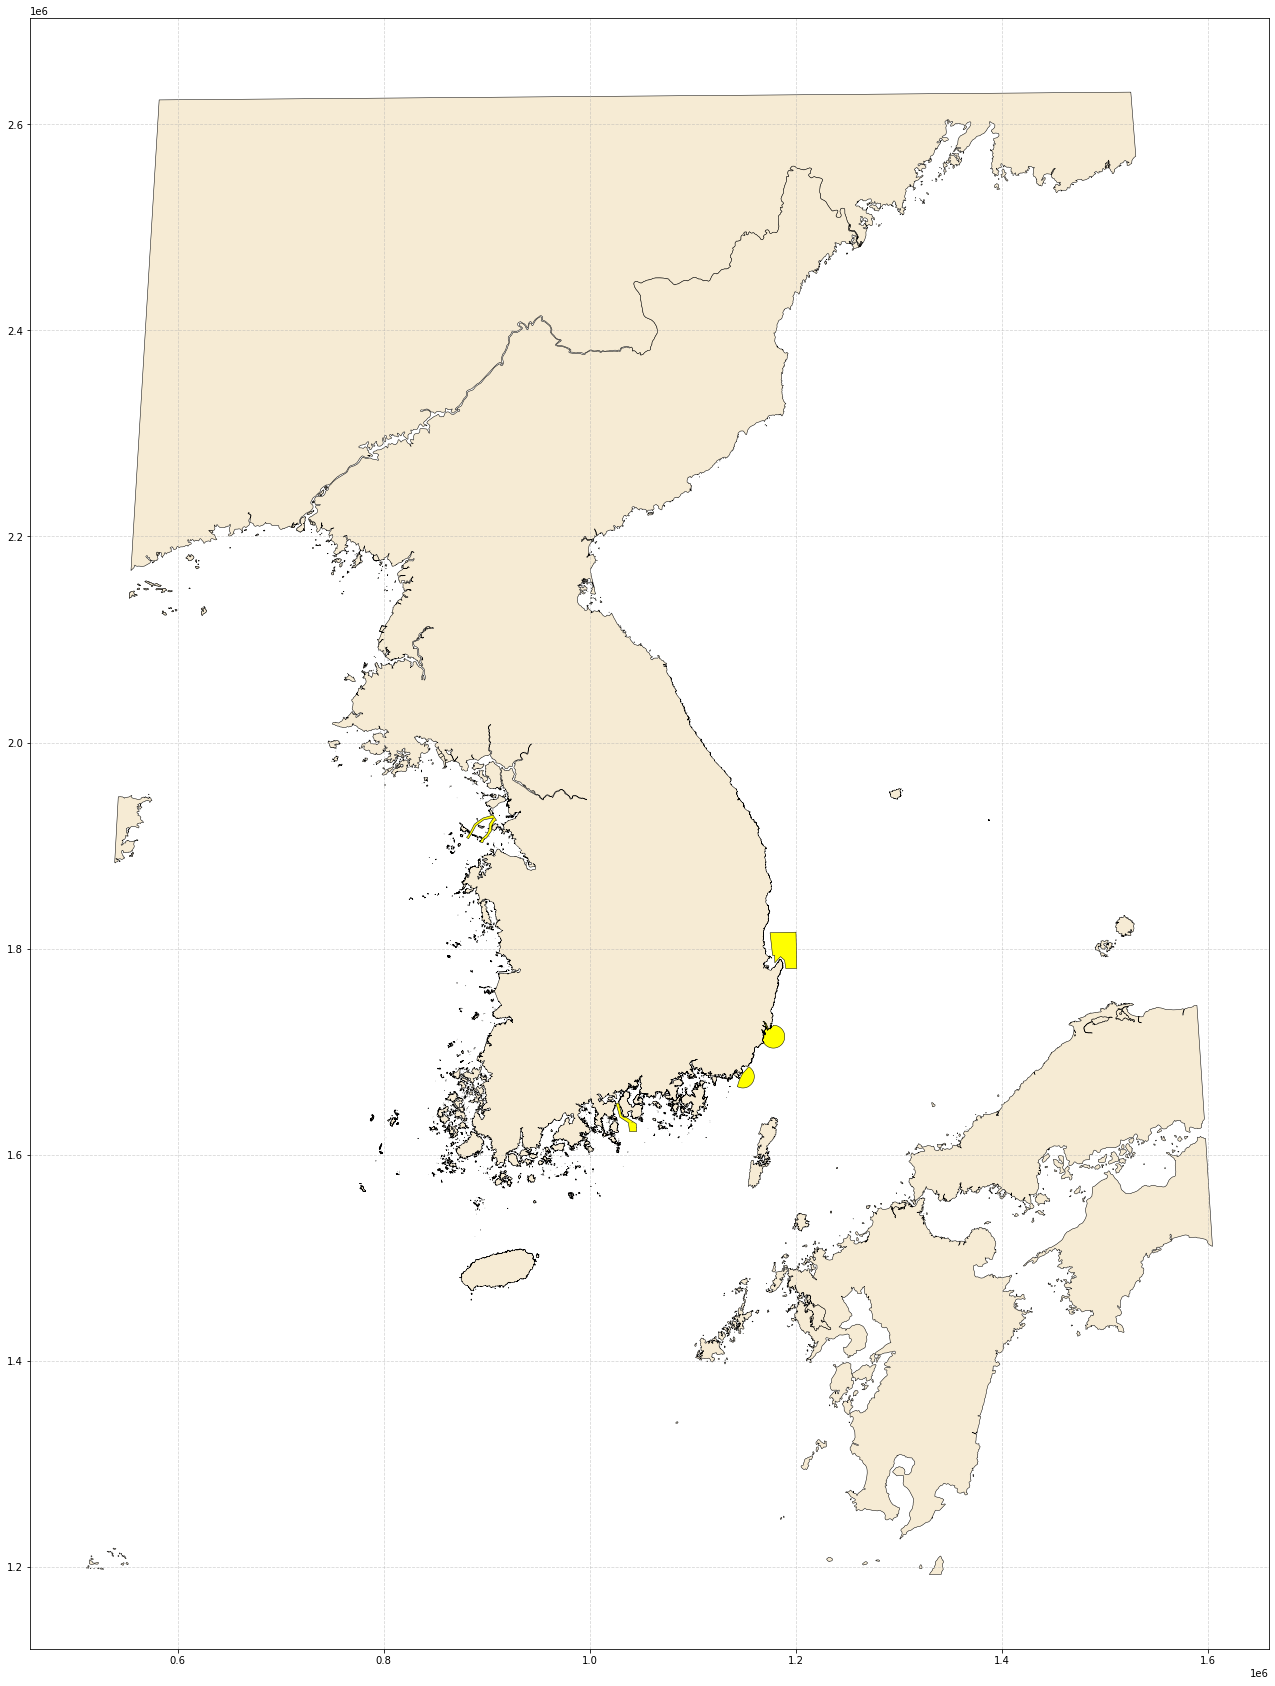

In [50]:

plot_map(result2)

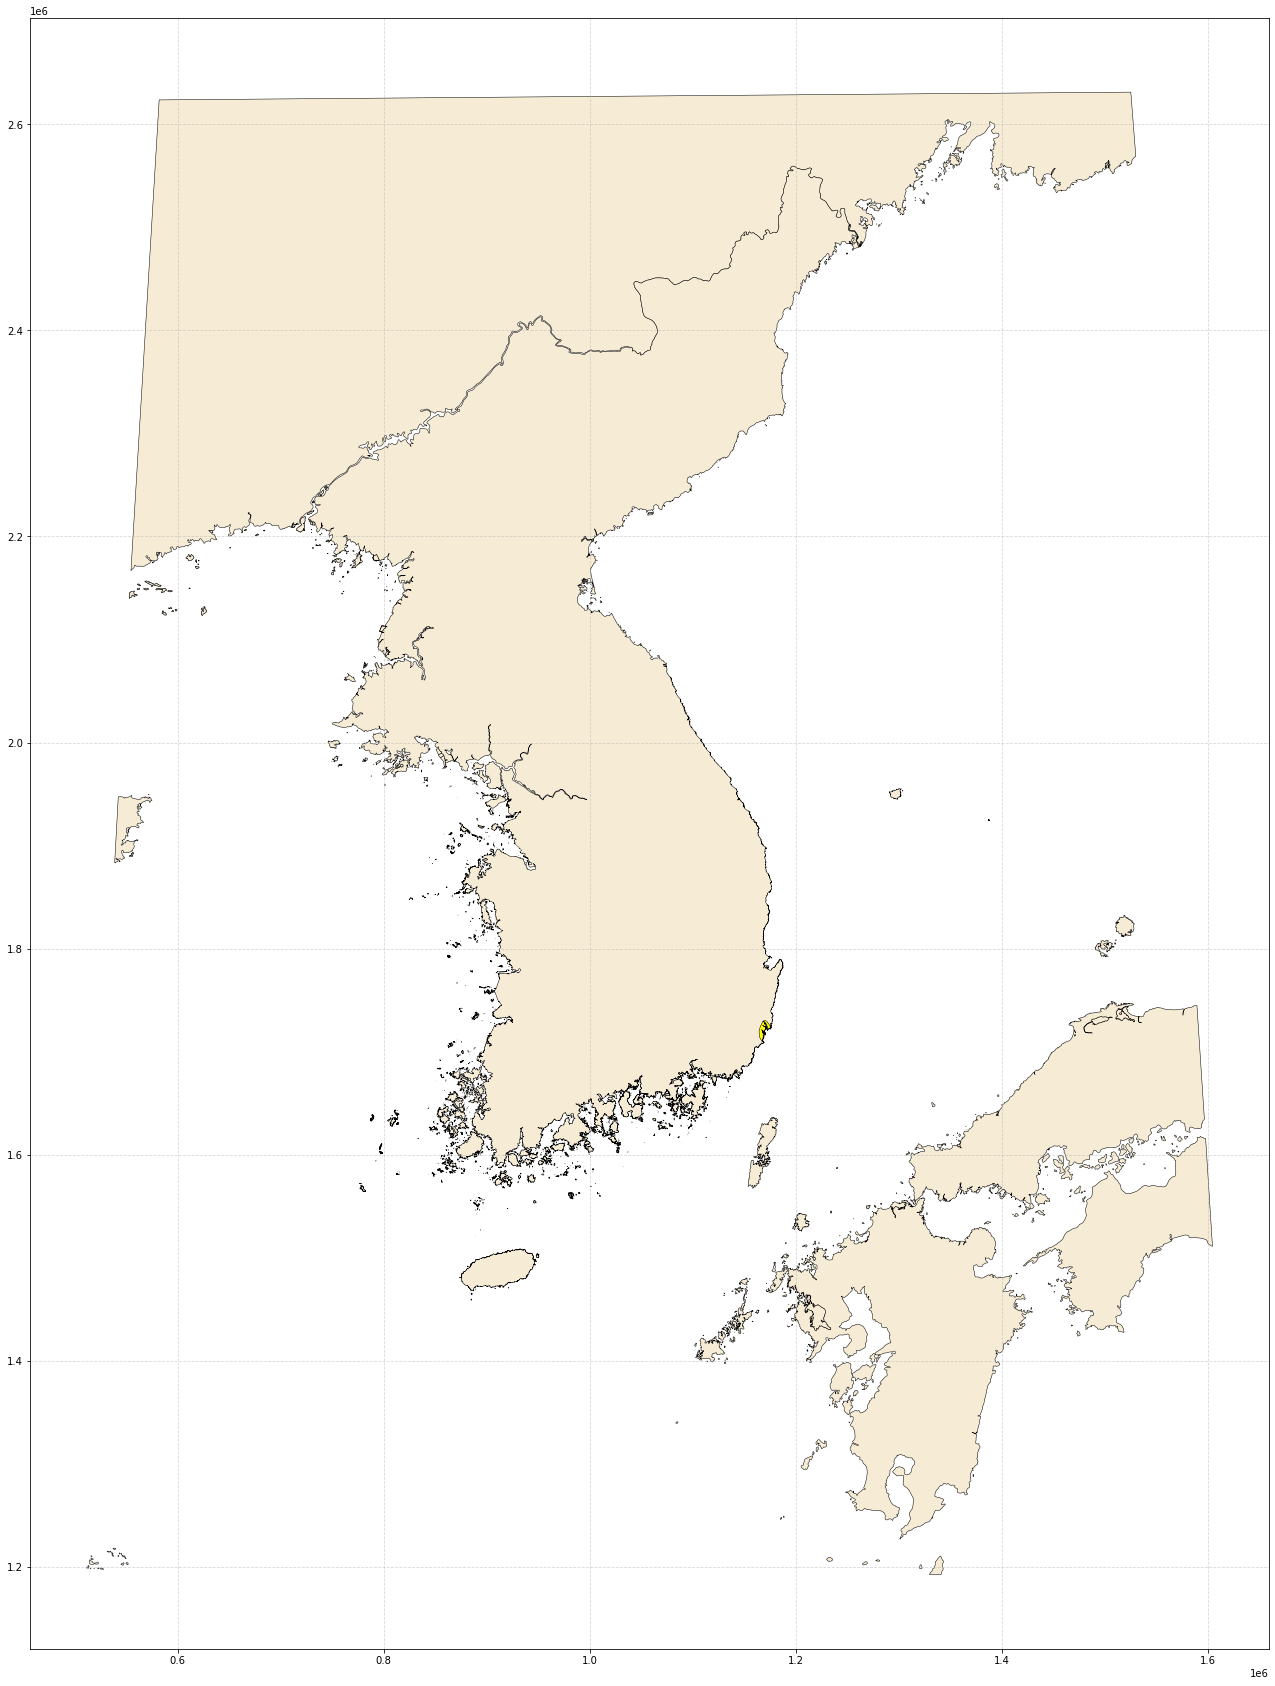

In [45]:
plot_map(result)

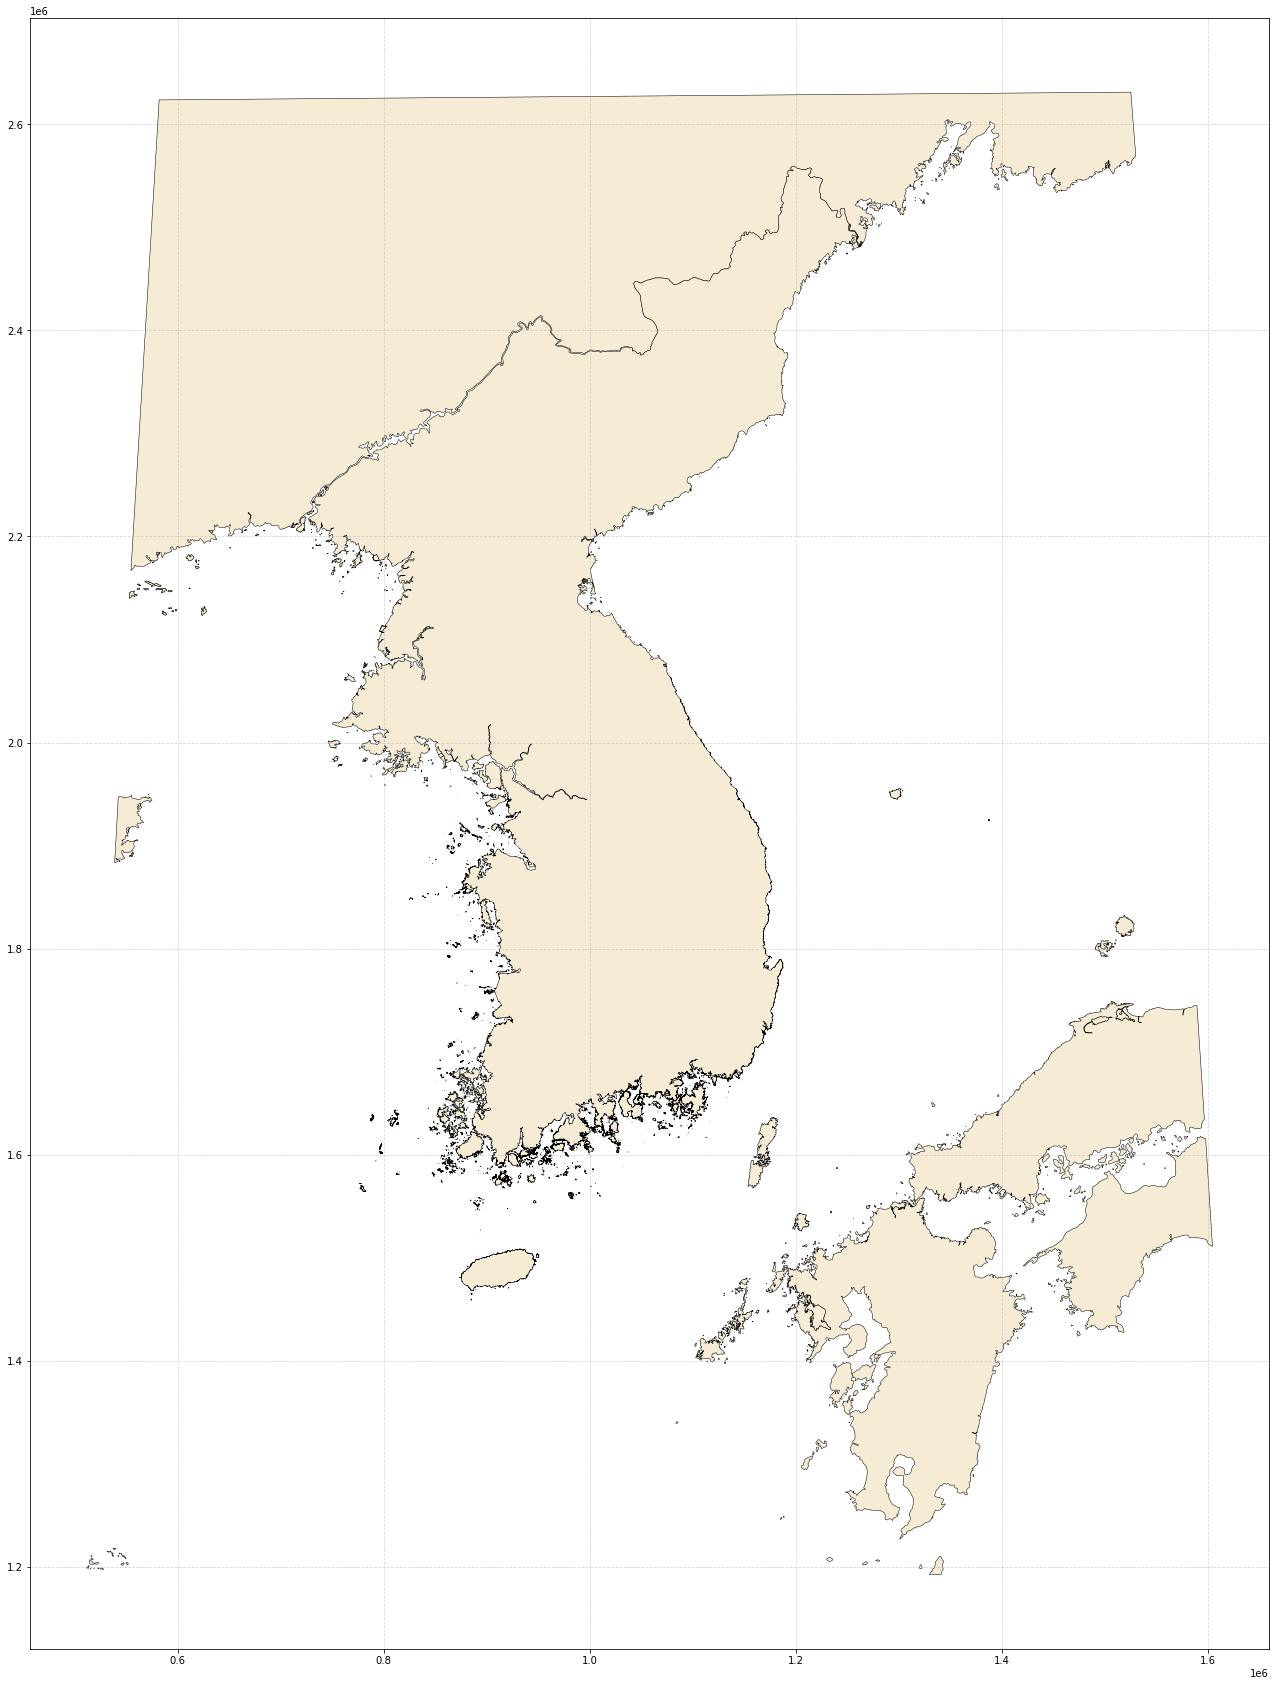

In [38]:
plot_map(object)

<AxesSubplot:>

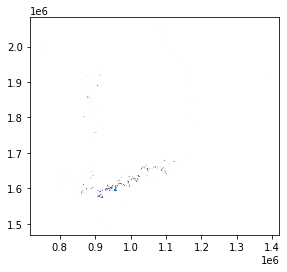

In [39]:
object.plot()

C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\geopandas\base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


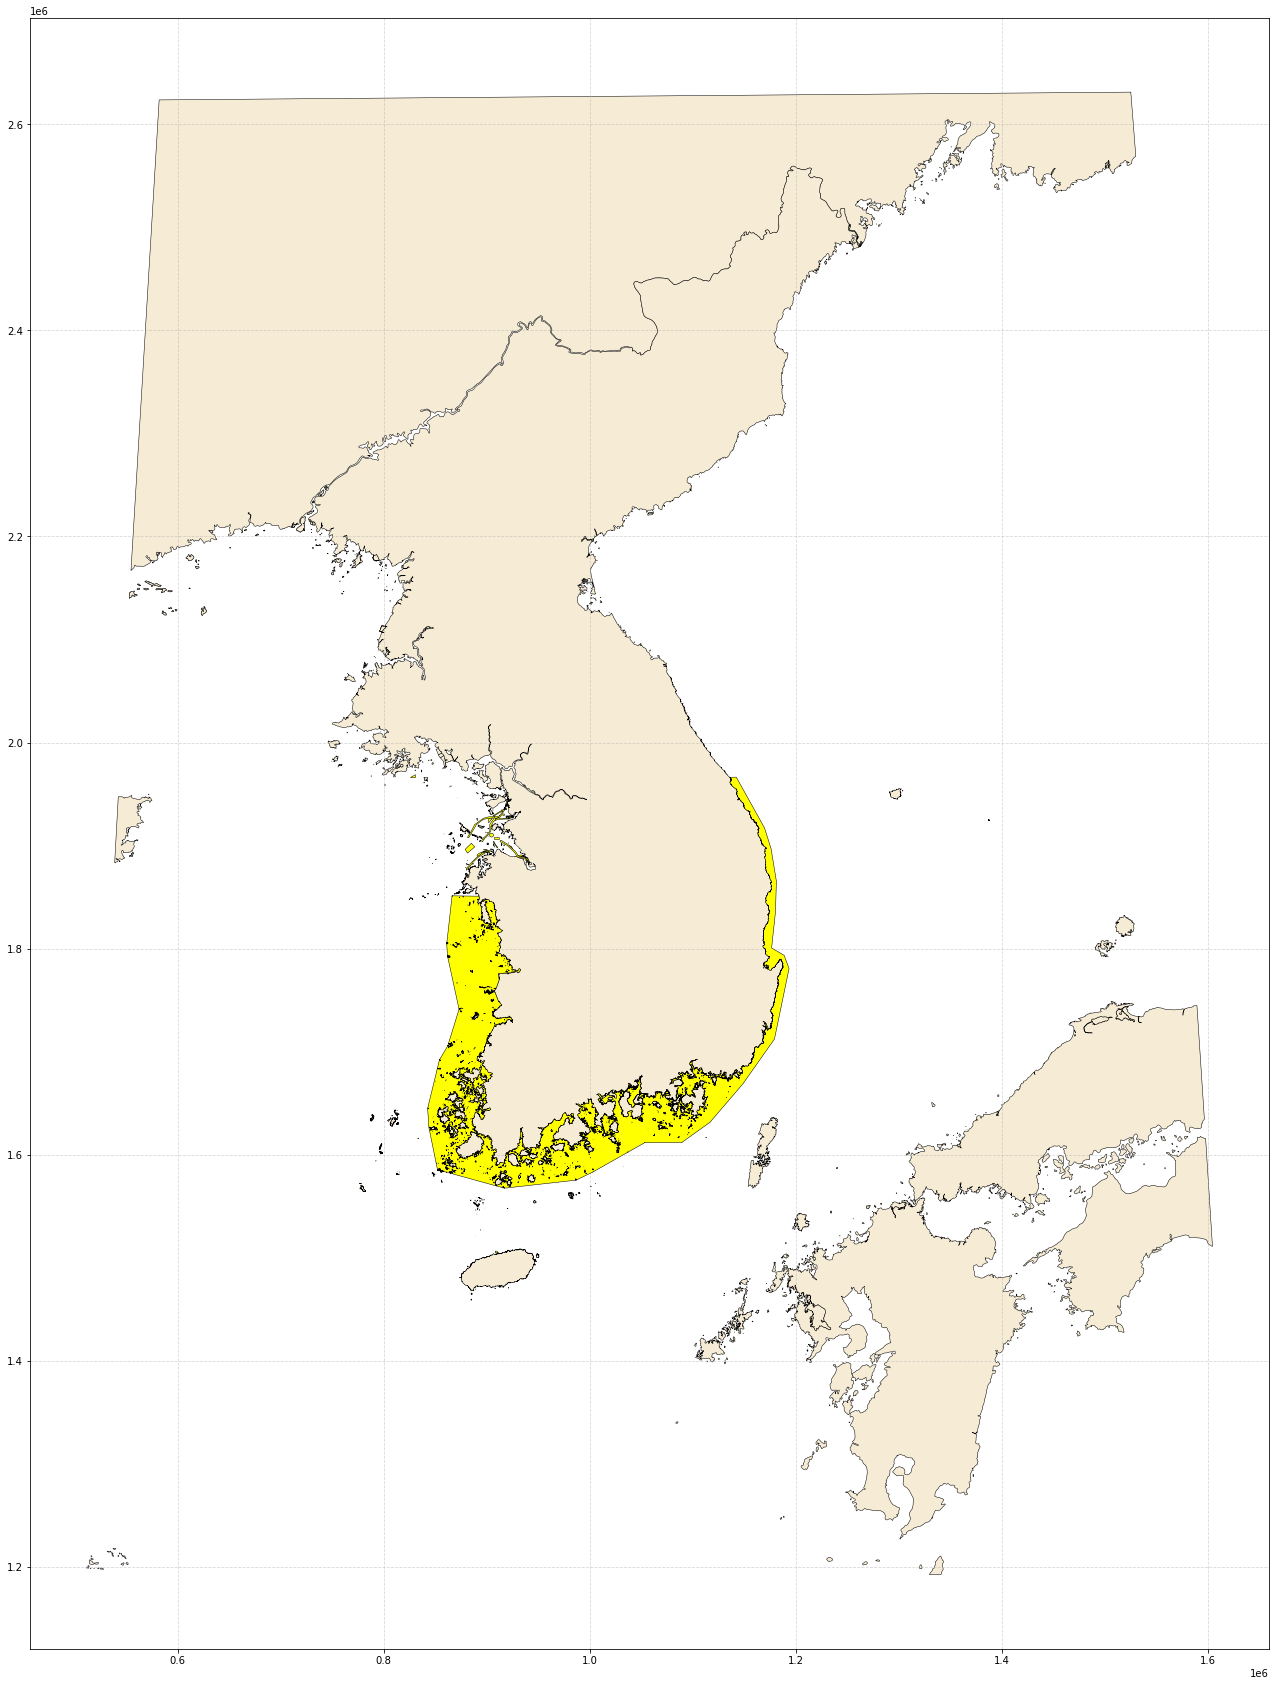

In [20]:
df = object.difference(input)
plot_map(df)

In [23]:
df.dropna(inplace=True)
df

0     MULTIPOLYGON (((857737.134 1584166.650, 857659...
1     POLYGON ((1171527.592 1722643.140, 1171515.787...
2     POLYGON ((1170531.460 1724226.187, 1170517.834...
3     POLYGON ((886716.028 1881865.070, 886551.331 1...
4     POLYGON ((938707.045 1884761.289, 938531.511 1...
5     POLYGON ((933877.575 1888937.644, 931366.270 1...
6     POLYGON ((898677.945 1893901.229, 898217.141 1...
7     POLYGON ((917012.540 1899749.139, 916821.039 1...
8     POLYGON ((902387.034 1893296.682, 900868.054 1...
9     POLYGON ((925163.442 1896889.405, 921859.087 1...
10    POLYGON ((916560.703 1928973.309, 916214.764 1...
11    POLYGON ((914624.888 1934022.779, 914344.784 1...
12    POLYGON ((919461.313 1943461.326, 919422.228 1...
13    POLYGON ((910503.484 1503842.188, 910462.726 1...
14    POLYGON ((910285.857 1897893.850, 907803.600 1...
15    POLYGON ((904677.563 1908275.525, 904359.647 1...
16    POLYGON ((930630.107 1890235.111, 930416.555 1...
17    POLYGON ((912342.261 1905909.908, 907605.8

In [22]:
input

,OBJECTID,Shape_Leng,Shape_Area,label,_count,_sum,_mean,area,geometry
0,539,290.177191,4651.114803,lnd_a,0.0,0.0,NaN,0.004648,"POLYGON ((890129.044 1542331.732, 890131.095 1..."
1,540,107.030900,453.482427,lnd_a,0.0,0.0,NaN,0.000453,"POLYGON ((890110.041 1542384.587, 890112.362 1..."
2,541,251.099622,2172.038062,lnd_a,0.0,0.0,NaN,0.002171,"POLYGON ((893121.627 1545874.175, 893121.707 1..."
3,542,150.209545,1521.482416,lnd_a,0.0,0.0,NaN,0.001520,"POLYGON ((893169.924 1546042.298, 893171.130 1..."
4,543,355.363105,6384.658359,lnd_a,0.0,0.0,NaN,0.006380,"POLYGON ((893105.356 1546162.714, 893105.576 1..."
...,...,...,...,...,...,...,...,...,...
19097,19990,215.102510,2932.528162,lnd_a,0.0,0.0,NaN,0.002930,"POLYGON ((888660.365 1520584.079, 888660.606 1..."
19098,19991,65.791039,299.247679,lnd_a,0.0,0.0,NaN,0.000299,"POLYGON ((894311.462 1526853.077, 894311.542 1..."
19099,19992,5.031071,1.933996,lnd_a,0.0,0.0,NaN,0.000002,"POLYGON ((894314.388 1526888.322, 894314.549 1..."
19100,19993,4.570763,1.511995,lnd_a,0.0,0.0,NaN,0.000002,"POLYGON ((894047.655 1526988.930, 894048.319 1..."


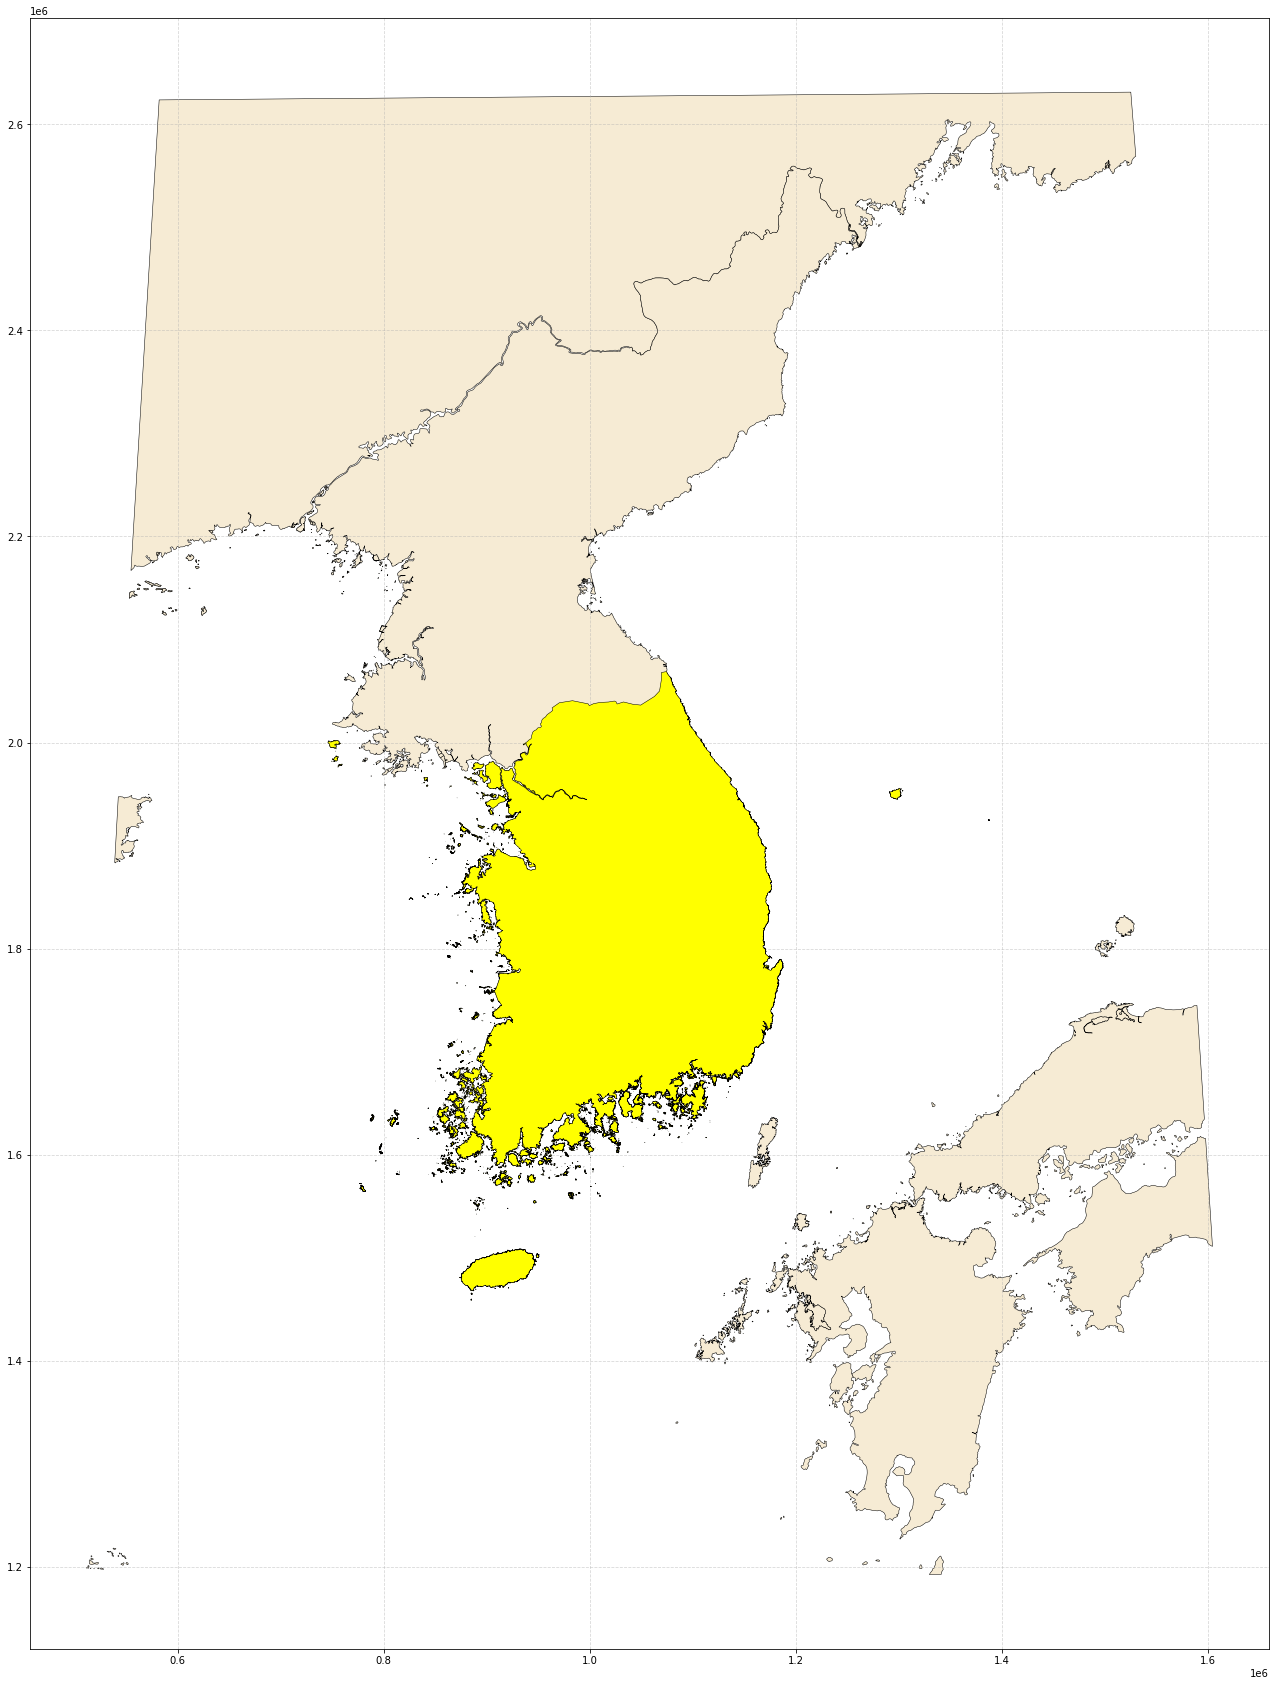

In [74]:
plot_map(input)

result